# 创建验证码数据集

## 引入第三方包


In [2]:
from captcha.image import ImageCaptcha

import string
import random
import numpy as np

from tensorflow import gfile
import matplotlib.pyplot as plt
import PIL.Image as Image


## 定义常量和字符集


In [7]:
NUMBER = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
LOWERCASE = [c for c in string.ascii_lowercase]
UPPERCASE = [c for c in string.ascii_uppercase]

CAPTCHA_CHARSET = NUMBER # 验证字符集
CAPTCHA_LEN = 4 # 验证码长度
CAPTCHA_HEIGHT = 60 # 验证码高度
CAPTCHA_WIDTH = 160 # 验证码宽度

TRAIN_DATASET_SIZE = 5000 # 验证码数据集大小
TEST_DATASET_SIZE = 1000
TRAIN_DATA_DIR = '../data/captcha/train/'
TEST_DATA_DIR = '../data/captcha/test/'


## 生成随机字符的方法


In [4]:
def gen_random_text(charset=CAPTCHA_CHARSET, length=CAPTCHA_LEN):
    text = [random.choice(charset) for _ in range(length)]
    return ''.join(text)


## 创建并保存验证码数据集的方法


In [6]:
def create_captcha_dataset(size=100,
                           data_dir='../data/captcha',
                           height=60,
                           width=160,
                           image_fmt='.png'):
    # 清空或创建 data_dir
    if gfile.Exists(data_dir):
        gfile.DeleteRecursively(data_dir)
    gfile.MakeDirs(data_dir)
    
    # 创建 ImageCaptcha 实例
    captcha = ImageCaptcha(width=width, height=height)
    
    for _ in range(size):
        # 生成随机的验证码字符
        text = gen_random_text(CAPTCHA_CHARSET, CAPTCHA_LEN)
        captcha.write(text, data_dir+text+image_fmt)
    return None
    

In [8]:
# 创建并保存训练数据
create_captcha_dataset(TRAIN_DATASET_SIZE, TRAIN_DATA_DIR)

# 创建并保存测试数据
create_captcha_dataset(TEST_DATASET_SIZE, TEST_DATA_DIR)


## 生成并返回验证码数据集的方法


In [10]:
def gen_captcha_dataset(size=100,
                        height=60,
                        width=160,
                        image_fmt=".png"):
    # 创建实例
    captcha = ImageCaptcha(width=width, height=height)
    
    # 创建存储数组
    images, texts = [None]*size, [None]*size
    for i in range(size):
        # 生成随机的验证码
        texts[i] = gen_random_text(CAPTCHA_CHARSET, CAPTCHA_LEN)
        # 使用Image.open() 打开验证码图像
        # 并将图像装换为(width, height, 3) 的 Numpy 数组
        images[i] = np.array(Image.open(captcha.generate(texts[i])))
    
    return images, texts
        

## 生成 100 张验证码的字符


In [12]:
images, texts = gen_captcha_dataset()


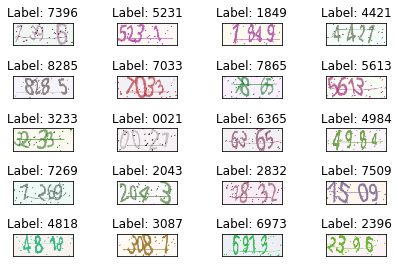

In [13]:
fig = plt.figure()
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.tight_layout()
    plt.imshow(images[i])
    plt.title("Label: {}".format(texts[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()
